In [1]:
'''
q_learning to solve the maze
'''

import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
from matplotlib import cm

from maze import MazeEnvSpecial4x4
from value_iteration import ValueIteration
from qlearning import QTableLearning

import numpy as np
np.random.seed(0)

def draw_cell(a,b,value,ax):
    '''Draw a corss cell
    '''
    x = b
    y = 3 - a
    v = [
   (x+0., y+0.),  # left, bottom
   (x+0., y+1.),  # left, top
   (x+1., y+1.),  # right, top
   (x+1., y+0.),  # right, bottom
   (x+0.5, y+0.5),  # middle
    ]
    codes = [Path.MOVETO, Path.LINETO, Path.LINETO, Path.CLOSEPOLY]
    # Left
    verts = [v[0], v[4], v[1], v[0]]
    path = Path(verts, codes)
    patch = patches.PathPatch(path, facecolor=cm.get_cmap("RdYlGn")(value[0]), lw=2)
    ax.add_patch(patch)
    ax.text(x+0.05, y+0.45, str(round(value[0]*10.0-5.0, 2)), color='k')

    # right
    verts = [v[2], v[4], v[3], v[2]]
    path = Path(verts, codes)
    patch = patches.PathPatch(path, facecolor=cm.get_cmap("RdYlGn")(value[1]), lw=2)
    ax.add_patch(patch)
    ax.text(x+0.7, y+0.45, str(round(value[1]*10.0-5.0, 2)), color='k')

    # up
    verts = [v[2], v[4], v[1], v[2]]
    path = Path(verts, codes)
    patch = patches.PathPatch(path, facecolor=cm.get_cmap("RdYlGn")(value[2]), lw=2)
    ax.add_patch(patch)
    ax.text(x+0.4, y+0.75, str(round(value[2]*10.0-5.0, 2)), color='k')

    # down
    verts = [v[0], v[4], v[3], v[0]]
    path = Path(verts, codes)
    patch = patches.PathPatch(path, facecolor=cm.get_cmap("RdYlGn")(value[3]), lw=2)
    ax.add_patch(patch)
    ax.text(x+0.4, y+0.15, str(round(value[3]*10.0-5.0, 2)), color='k')

def draw_block(a, b, color, ax, text=None):
    '''Draw a block cell
    '''
    x = b
    y = 3 - a
    v = [
   (x+0., y+0.),  # left, bottom
   (x+0., y+1.),  # left, top
   (x+1., y+1.),  # right, top
   (x+1., y+0.),  # right, bottom
   (x+0.5, y+0.5),  # middle
    ]
    codes = [Path.MOVETO, Path.LINETO, Path.LINETO, Path.LINETO, Path.CLOSEPOLY]
    path = Path(v, codes)
    patch = patches.PathPatch(path, facecolor=cm.get_cmap("RdYlGn")(color), lw=2)
    ax.add_patch(patch)
    if text:
        ax.text(x+0.35, y+0.45, str(text), color='k')

def draw_qtable(q, map, ax):
    '''Draw the q-table
    '''
    N = map.shape[0]
    for i in range(N):
        for j in range(N):
            if map[i,j]==5:
                draw_block(i, j, 1.0, ax, 'Goal')
            elif map[i,j]==-5:
                draw_block(i, j, 0.0, ax, None)
            else:
                draw_cell(i, j, (q[i,j]+5.0)/10.0, ax)


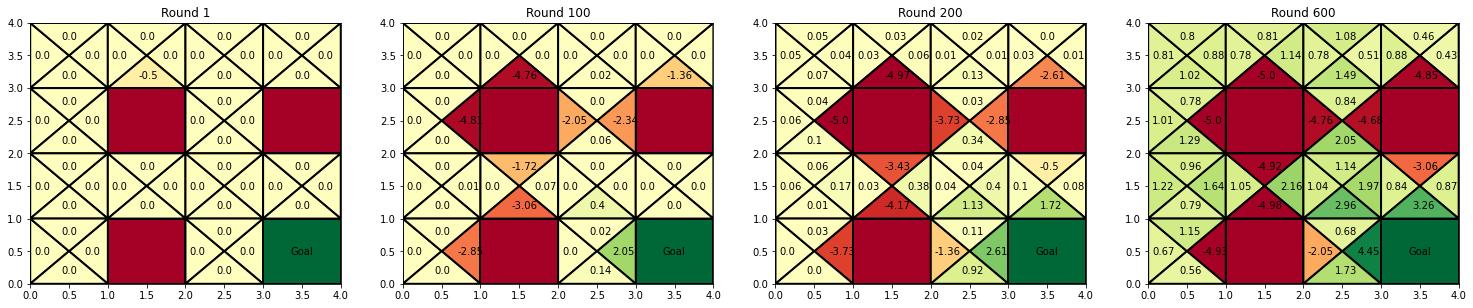

In [2]:

# Part 1: The Opyimization Procedure
env = MazeEnvSpecial4x4()
alg = QTableLearning(env)
done_cnt = 0
current_state = env.reset()
trajectory_mat = env.reward.copy()
fig = plt.figure(figsize=[6.4*4, 4.8])
counter = 0
step = [1, 99, 100, 400]
for i in range(4):
    alg.train(step[i])
    counter = counter + step[i]
    ax = fig.add_subplot(1, 4, i+1)
    draw_qtable(alg.q_table, trajectory_mat, ax)
    ax.set_xlim(0, 4)
    ax.set_ylim(0, 4)
    plt.title('Round '+str(counter))
plt.show()

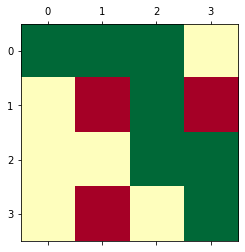

In [8]:
# Part 2: The Decision Procedure
plt.ion()
env = MazeEnvSpecial4x4()
alg = ValueIteration(env)
alg.train()
done_cnt = 0
current_state = env.reset()
trajectory_mat = env.reward.copy()
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
while True:
    action = alg.predict(current_state)
    trajectory_mat[current_state[0], current_state[1]] = 5
    ax.matshow((trajectory_mat+5.0)/10.0, cmap="RdYlGn")
    # plt.pause(0.5)
    current_state, reward, done, _ = env.step(action)
    if done:
        break
    done_cnt += 1
trajectory_mat[current_state[0], current_state[1]] = 5
ax.matshow((trajectory_mat+5.0)/10.0, cmap="RdYlGn")
# plt.pause(0.5)